## 1. Collect the data

In this case, we have to extract from the Spotify API the information of the tracks and artist that I want to cluster.

Based on: 
* Spotify Developers platform: https://developer.spotify.com/
* How to extract data from Spotify tutorial: https://rareloot.medium.com/extracting-spotify-data-on-your-favourite-artist-via-python-d58bc92a4330

In [ ]:
! pip install spotipy --upgrade

     |████████████████████████████████| 143kB 4.5MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import spotipy
from spotipy import SpotifyClientCredentials, util
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

### 1.1. Authentication

In [ ]:
import os

os.environ["SPOTIPY_CLIENT_ID"] = "462608ee0dd145a3bd9eb93ec19c257e"
os.environ["SPOTIPY_CLIENT_SECRET"] = "517667e8f5c14015b331db57d3f85f56"

In [ ]:
# Client Credentials flow
client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists('spotify')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:37i9dQZF1DXcBWIGoYBM5M Today's Top Hits
   2 spotify:playlist:37i9dQZF1DX0XUsuxWHRQd RapCaviar
   3 spotify:playlist:37i9dQZF1DX1lVhptIYRda Hot Country
   4 spotify:playlist:37i9dQZF1DX10zKzsJ2jva ¡Viva Latino!
   5 spotify:playlist:37i9dQZF1DX4JAvHpjipBk New Music Friday
   6 spotify:playlist:37i9dQZF1DX4sWSpwq3LiO Peaceful Piano
   7 spotify:playlist:37i9dQZF1DX4SBhb3fqCJd Are & Be
   8 spotify:playlist:37i9dQZF1DWXRqgorJj26U Rock Classics
   9 spotify:playlist:37i9dQZF1DX4dyzvuaRJ0n mint
  10 spotify:playlist:37i9dQZF1DXcF6B6QPhFDv Rock This
  11 spotify:playlist:37i9dQZF1DWXJfnUiYjUKT New Music Friday
  12 spotify:playlist:37i9dQZF1DXcRXFNfZr7Tp just hits
  13 spotify:playlist:37i9dQZF1DX4o1oenSJRJd All Out 00s
  14 spotify:playlist:37i9dQZF1DXbTxeAdrVG2l All Out 90s
  15 spotify:playlist:37i9dQZF1DX4UtSsGT1Sbe All Out 80s
  16 spotify:playlist:37i9dQZF1DWTJ7xPn4vNaz All Out 70s
  17 spotify:playlist:37i9dQZF1DXaKIA8E7WcJj All Out 60s
  18 spotify:playlist:37i

### 1.2. Search the artist

In case you don't find your artist in the first option, you can manually list all the artist finded.

Some bands don't find easily, due to various playlists prior to the band playlist itself that have a similar name.

In [ ]:
bands = ['Dream Theater','Spiritbox','Bring Me The Horizon','Monuments','Periphery','Parkway Drive','Killswitch Engage','Mestis','Meshuggah','Iron Maiden','Metallica','Septicflesh','Lorna Shore']

result = []

for i in bands:
  name = i
  search_band = sp.search(name, market='CO')
  search_band = search_band['tracks']['items'][1]['artists']
  result.append(search_band)

### 1.3. Extract Spotify albums

In [ ]:
#Extract Artist's uri

artist_uri = []

for i in range(len(result)):
  uri = result[i][0]['uri']
  artist_uri.append(uri)

In [ ]:
#Pull all of the artist's albums

sp_albums = []

for uri in artist_uri:
  each_album = sp.artist_albums(uri, album_type='album')
  sp_albums.append(each_album)

In [ ]:
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
album_artist = []

for i in range(len(sp_albums)):
  for j in range(len(sp_albums[i]['items'])):
    album_names.append(sp_albums[i]['items'][j]['name'])
    album_uris.append(sp_albums[i]['items'][j]['uri'])
    album_artist.append(sp_albums[i]['items'][j]['artists'][0]['name'])

### 1.4. Extract the tracks of each album

In [ ]:
def albumSongs(uri):

  album = uri #assign album uri to a_name

  spotify_albums[album] = {} #Creates dictionary for that specific album

  #Create keys-values of empty lists inside nested dictionary for album
  spotify_albums[album]['artist'] = []
  spotify_albums[album]['album'] = [] #create empty list
  spotify_albums[album]['track_number'] = []
  spotify_albums[album]['id'] = []
  spotify_albums[album]['name'] = []
  spotify_albums[album]['uri'] = []

  tracks = sp.album_tracks(album) #pull data on album tracks
  
  for n in range(len(tracks['items'])): #for each song track
    spotify_albums[album]['artist'].append(album_artist[album_count])
    spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
    spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
    spotify_albums[album]['id'].append(tracks['items'][n]['id'])
    spotify_albums[album]['name'].append(tracks['items'][n]['name'])
    spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])  

Now you can apply the function to each album URI in the list to pull track data. Also you need to create an empty dictionary called to store your spotify album data.

In [ ]:
spotify_albums = {}
album_count = 0

for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Distant Memories - Live in London (Bonus Track Edition) songs has been added to spotify_albums dictionary
Album Distant Memories - Live in London (Bonus Track Edition) songs has been added to spotify_albums dictionary
Album Distance Over Time (Bonus track version) songs has been added to spotify_albums dictionary
Album The Astonishing songs has been added to spotify_albums dictionary
Album Breaking the Fourth Wall (Live at the Boston Opera House, Boston, MA, 3/25/2014) songs has been added to spotify_albums dictionary
Album Dream Theater songs has been added to spotify_albums dictionary
Album A Dramatic Turn of Events songs has been added to spotify_albums dictionary
Album Black Clouds & Silver Linings songs has been added to spotify_albums dictionary
Album Black Clouds & Silver Linings (Special Edition) songs has been added to spotify_albums dictionary
Album Chaos in Motion 2007 - 2008 songs has been added to spotify_albums dictionary
Album Systematic Chaos songs has been added 

### 1.5. Grab the audio features

There’s probably a more space efficient way of doing this but I prioritise visibility and structure when writing code.

Here we add additional key-values to store the audio features of each album track and append the data into lists representing all the music tracks for that album.

In [ ]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []

    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

**Loop through the albums extracting the audio features**

We will need to add a random delay every few albums to avoid sending too many requests at Spotify’s API.
We will also set up print statements to track which album we are on incase we encounter errors and want to know where in the data it happened.

In [ ]:
import time
import numpy as np

sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0

for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 20.35547375679016 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 29.813969612121582 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 38.55270457267761 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 56.71621012687683 seconds
25 playlists completed
Loop #: 25
Elapsed Time: 66.2310950756073 seconds
30 playlists completed
Loop #: 30
Elapsed Time: 78.45263934135437 seconds
35 playlists completed
Loop #: 35
Elapsed Time: 88.50184559822083 seconds
40 playlists completed
Loop #: 40
Elapsed Time: 106.42010116577148 seconds
45 playlists completed
Loop #: 45
Elapsed Time: 125.5631902217865 seconds
50 playlists completed
Loop #: 50
Elapsed Time: 137.93948316574097 seconds
55 playlists completed
Loop #: 55
Elapsed Time: 151.3989326953888 seconds
60 playlists completed
Loop #: 60
Elapsed Time: 159.61440706253052 seconds
65 playlists completed
Loop #: 65
Elapsed Time: 170.6677224636078 seconds
70 playlists completed
Loop #: 70
Ela

### 1.6. Create a dataset

* Add data to a new dataframe

But first we will organise our data into a dictionary which can more easily be turned into a dataframe.

In [ ]:
dic_df = {}
dic_df['artist'] = []
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []

for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

2519

* Convert into a dataframe:

In [ ]:
df = pd.DataFrame.from_dict(dic_df)
df.head()

,artist,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Dream Theater,Distant Memories - Live in London (Bonus Track...,1,3ZvF0LCkbLlgLBiqtQkQfn,"Untethered Angel - Live at Hammersmith Apollo,...",spotify:track:3ZvF0LCkbLlgLBiqtQkQfn,0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,32
1,Dream Theater,Distant Memories - Live in London (Bonus Track...,2,34webXoSt256KzAryBsDKF,A Nightmare to Remember - Live at Hammersmith ...,spotify:track:34webXoSt256KzAryBsDKF,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,32
2,Dream Theater,Distant Memories - Live in London (Bonus Track...,3,4tHu3p37J5CAwIuxxMvN3l,Fall into the Light - Live at Hammersmith Apol...,spotify:track:4tHu3p37J5CAwIuxxMvN3l,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,30
3,Dream Theater,Distant Memories - Live in London (Bonus Track...,4,4Q525O0OI9xF2L7zyLXn8H,"Barstool Warrior - Live at Hammersmith Apollo,...",spotify:track:4Q525O0OI9xF2L7zyLXn8H,0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,31
4,Dream Theater,Distant Memories - Live in London (Bonus Track...,5,5ZrPkInlMXuJedOmkSLHqS,In the Presence of Enemies - Part 1 - Live at ...,spotify:track:5ZrPkInlMXuJedOmkSLHqS,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,30


## 2. Inside the data

### 2.1. Standarize

We have to unify the format on the data to avoid duplicate values and non-desired strings

#### Unify format

In [ ]:
cols = df.select_dtypes(include=[np.object]).columns
df[cols] = df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
df[cols] = df[cols].apply(lambda x: x.str.lower())
df.head()

,artist,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,dream theater,distant memories - live in london (bonus track...,1,3zvf0lckbllglbiqtqkqfn,"untethered angel - live at hammersmith apollo,...",spotify:track:3zvf0lckbllglbiqtqkqfn,0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,32
1,dream theater,distant memories - live in london (bonus track...,2,34webxost256kzarybsdkf,a nightmare to remember - live at hammersmith ...,spotify:track:34webxost256kzarybsdkf,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,32
2,dream theater,distant memories - live in london (bonus track...,3,4thu3p37j5cawiuxxmvn3l,fall into the light - live at hammersmith apol...,spotify:track:4thu3p37j5cawiuxxmvn3l,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,30
3,dream theater,distant memories - live in london (bonus track...,4,4q525o0oi9xf2l7zylxn8h,"barstool warrior - live at hammersmith apollo,...",spotify:track:4q525o0oi9xf2l7zylxn8h,0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,31
4,dream theater,distant memories - live in london (bonus track...,5,5zrpkinlmxujedomkslhqs,in the presence of enemies - part 1 - live at ...,spotify:track:5zrpkinlmxujedomkslhqs,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,30


In [ ]:
df.to_csv(r"C:\Users\aaron\Documents\Aaron\Documentos\Posgrado UdeA\2021-1\Cloud\azure-ml-entrega\data\data.csv")

In [ ]:
df['artist'].value_counts()

metallica               285
iron maiden             281
dream theater           279
bring me the horizon    250
septicflesh             244
incubus                 238
meshuggah               228
parkway drive           219
killswitch engage       207
periphery               192
lorna shore              50
mestis                   26
lou reed                 20
Name: artist, dtype: int64

#### Validate the bands required

We have to check the artists selected in the playlists and drop the unselected.

In [ ]:
unique_artist = list(df['artist'].unique())
unique_artist

['dream theater',
 'bring me the horizon',
 'incubus',
 'periphery',
 'parkway drive',
 'killswitch engage',
 'mestis',
 'meshuggah',
 'iron maiden',
 'metallica',
 'lou reed',
 'septicflesh',
 'lorna shore']

In [ ]:
bands = pd.Series(bands).apply(lambda x: x.lower()).to_list()
bands

['dream theater',
 'spiritbox',
 'bring me the horizon',
 'monuments',
 'periphery',
 'parkway drive',
 'killswitch engage',
 'mestis',
 'meshuggah',
 'iron maiden',
 'metallica',
 'septicflesh',
 'lorna shore']

In [ ]:
# Let's use a list comprehension two compare two lists and return the difference

def compare_lists(l1,l2):
  l2 = set(l2)
  unselected = [x for x in l1 if x not in l2]

  return unselected

In [ ]:
# Remove the unselected band
df = df[~df.artist.isin(compare_lists(unique_artist,bands))]

df['artist'].value_counts()

metallica               285
iron maiden             281
dream theater           279
bring me the horizon    250
septicflesh             244
meshuggah               228
parkway drive           219
killswitch engage       207
periphery               192
lorna shore              50
mestis                   26
Name: artist, dtype: int64

### 2.2. Cleaning

#### Remove duplicates:

Spotify has a duplicate issue which we have to delete manually.

In [ ]:
print("# Observations all dataset: {}".format(len(df)))
df_spotify = df[['artist',
                 'album',
                 'name',
                 'acousticness',
                 'danceability',
                 'energy',
                 'instrumentalness',
                 'liveness',
                 'loudness',
                 'speechiness',
                 'tempo',
                 'valence',
                 'popularity']].sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print("Observations without duplicates: {}".format(len(df_spotify)))

# Observations all dataset: 2261
Observations without duplicates: 1410


In [ ]:
df_spotify[df_spotify['name']=="marigold - live in london"]

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
772,periphery,live in london,marigold - live in london,0.0144,0.408,0.957,0.00264,0.713,-4.425,0.124,106.454,0.146,19


In [ ]:
df_spotify.sort_values(by=['popularity'], ascending=False)

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
383,bring me the horizon,sempiternal (expanded edition),can you feel my heart,0.002010,0.150,0.859,0.194000,0.3870,-2.827,0.0595,170.527,0.3540,77
349,bring me the horizon,that's the spirit,throne,0.000455,0.426,0.888,0.000000,0.3060,-3.720,0.0987,144.111,0.3870,73
284,bring me the horizon,post human: survival horror,kingslayer (feat. babymetal),0.000207,0.434,0.929,0.001090,0.0916,-2.749,0.1470,92.541,0.4280,72
285,bring me the horizon,post human: survival horror,1x1 (feat. nova twins),0.000209,0.452,0.937,0.000004,0.6060,-3.346,0.1610,164.032,0.6040,69
351,bring me the horizon,that's the spirit,follow you,0.076500,0.540,0.661,0.000000,0.1250,-5.534,0.0381,90.012,0.5060,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,meshuggah,destroy erase improve (japan edition),inside what's within behind - (demo) [bonus tr...,0.000866,0.353,0.876,0.031800,0.1600,-8.865,0.1360,130.394,0.2040,0
1494,meshuggah,contradictions collapse (japan edition),gods of rapture - bonus track,0.014400,0.304,0.979,0.010400,0.3590,-4.235,0.0922,82.689,0.1810,0
1493,meshuggah,contradictions collapse (japan edition),ritual - bonus track,0.000137,0.356,0.986,0.359000,0.0714,-5.410,0.1030,95.117,0.0846,0
1492,meshuggah,contradictions collapse (japan edition),sickening - bonus track,0.001160,0.417,0.974,0.002380,0.0835,-6.055,0.1360,132.507,0.0390,0


#### Verifying null values...

In [ ]:
df_spotify.isnull().sum()

artist              0
album               0
name                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

There aren't null values.

### 2.3. Explore

#### Describe variables

In [ ]:
df_spotify.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000
mean,0.053824,0.337966,0.871358,0.210164,0.411820,-6.055546,0.106011,123.734243,0.244332,28.924823
std,0.172468,0.120750,0.176113,0.328414,0.316822,2.830223,0.075077,29.735729,0.146345,13.769367
min,0.000000,0.060700,0.000030,0.000000,0.027400,-34.327000,0.025900,32.806000,0.022300,0.000000
25%,0.000065,0.247500,0.864000,0.000398,0.126250,-6.919750,0.058400,100.936750,0.133250,19.250000
50%,0.000481,0.315500,0.940000,0.010550,0.316000,-5.489500,0.086950,123.276000,0.220500,29.000000
75%,0.005700,0.431000,0.973000,0.310000,0.706000,-4.456250,0.133750,140.395250,0.335000,38.000000
max,0.966000,0.781000,0.999000,0.976000,0.995000,-1.759000,0.854000,203.000000,0.850000,77.000000


#### Plotting features

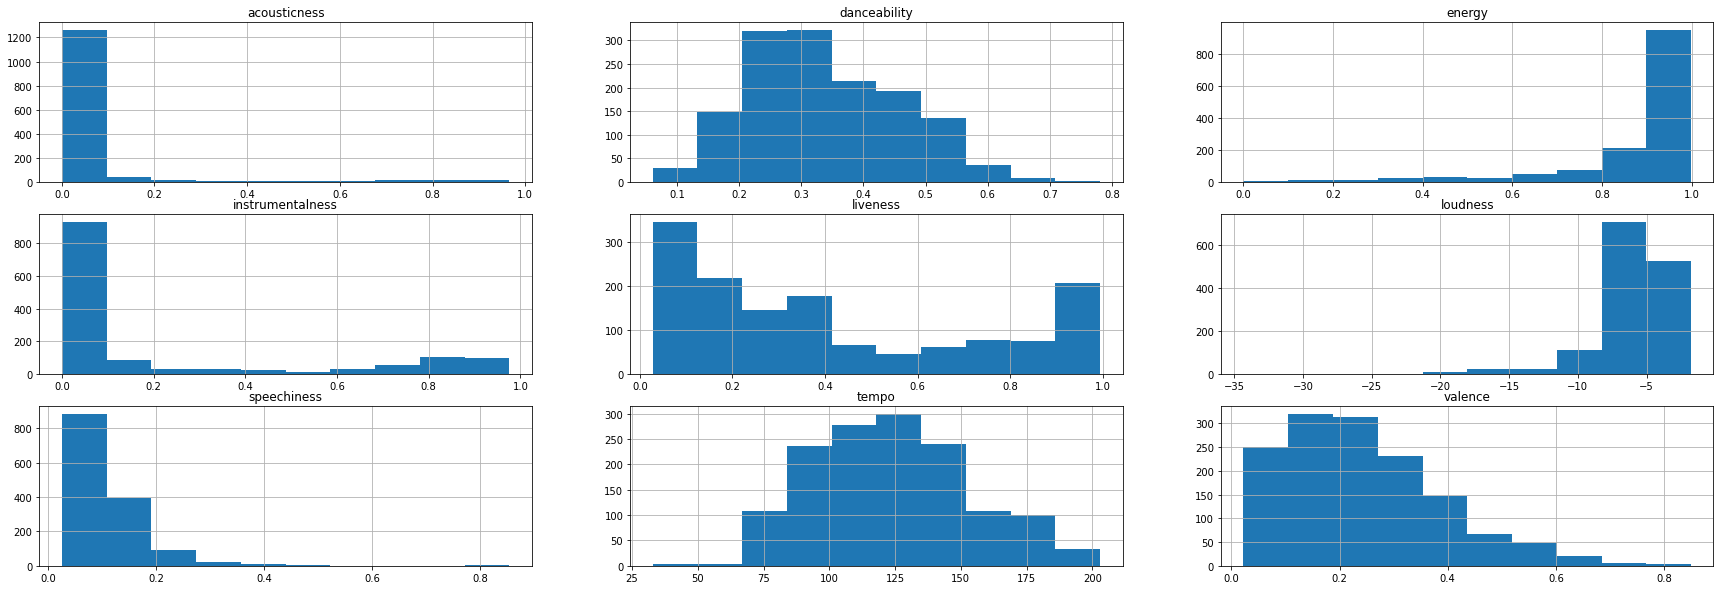

In [ ]:
import matplotlib.pyplot as plt

continuus_columns = df_spotify.select_dtypes(include=[np.float]).columns

fig = plt.figure(figsize=(30,10))

for cols,i in zip(continuus_columns,range(1,len(continuus_columns)+1)):

  ax = fig.add_subplot(3,3,i)
  df_spotify[cols].hist()
  ax.set_title(cols)

Based on the Spotify features and the bands selected in this case:

* *Acousticness:* The mean close to zero describes the probability that neither of the songs are acoustic, that it makes sence because the music genre is in general Modern Metal.
* *Danceability:* The distribution take place < 0.5, being least danceable, due to the Genre
* *Energy:* As expected, this songs have to much energy (measure close to 1.0), the playlist contain some prog, heavy and death metal bands.
* *Instrumentalness:* The majority of the songs have vocals, but at least two bands in the list are instrumental, that explain the lightweight distribution close to 1.0.
* *Liveness:* The most variable distribution here, and thats why we have the majority of tracks record only in studio, but some live albums in the discography of each band.
* *Loudness:* Due to the intesity of the Genre, this bands have in common a Loudness close to 0, when the normal range is typically between -60 and 0.
* *Speechiness:* All the distribution places minus 0.33, that represent only music and other tracks without spoken words only.
* *Tempo:* The mean in 124 BPM is moderated compared with other genres and artists, Metal in general has velocity in their tracks.
* *Valence:* The positiveness of the songs is poor, this means the majority of the playlists will have negative feelings like angry, depression and sadness, this is subjective and it doesn't represent the attitude of all the listeners, but for project purposes it helps to identify the feelings generated in each playlist.

### 2.4. Preprocessing

#### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = df_spotify.copy(deep=True) # Copy to train the model

# Categorical variables
categorical = X.select_dtypes(include = "object").columns
print(categorical)

# Model Schema
LE = LabelEncoder()

# Only on the categorical variables
for var in categorical:
    X[var] = LE.fit_transform(X[var].astype(str))

print (X.head(5))

Index(['artist', 'album', 'name'], dtype='object')
   artist  album  name  acousticness  ...  speechiness    tempo  valence  popularity
0       1     31  1330      0.000180  ...       0.1010   89.973   0.2010          32
1       1     31    42      0.000091  ...       0.2380  136.444   0.0897          32
2       1     31   371      0.000333  ...       0.2830  171.961   0.1570          30
3       1     31   110      0.000518  ...       0.0911  155.978   0.2210          31
4       1     31   552      0.000317  ...       0.2180  186.270   0.1710          30

[5 rows x 13 columns]


#### Scaling

With MinMaxScaler to preserve the variables distribution

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

print("\nData scaled!")


Data scaled!


## 3. Clustering Model Design


### 3.1. Centroid-based: Kmeans Clustering


#### Elbow Method to identify the optimal number of clusters

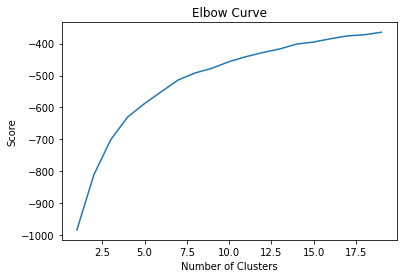

In [ ]:
from sklearn.cluster import KMeans

clust = range(1, 20)    # Number of clusters
kmeans = [KMeans(n_clusters=i) for i in clust]

score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

plt.plot(clust,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Model implementation

With 3 clusters (playlists)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, r2_score, roc_auc_score 

# Train
kmeans = KMeans(init="k-means++",
                n_clusters=3,
                random_state=15).fit(X_scaled)

# Assign the playlist into the dataset
df_spotify['kmeans'] = kmeans.labels_

In [ ]:
df_spotify.head()

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans
0,dream theater,distant memories - live in london (bonus track...,"untethered angel - live at hammersmith apollo,...",0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,32,2
1,dream theater,distant memories - live in london (bonus track...,a nightmare to remember - live at hammersmith ...,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,32,2
2,dream theater,distant memories - live in london (bonus track...,fall into the light - live at hammersmith apol...,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,30,2
3,dream theater,distant memories - live in london (bonus track...,"barstool warrior - live at hammersmith apollo,...",0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,31,2
4,dream theater,distant memories - live in london (bonus track...,in the presence of enemies - part 1 - live at ...,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,30,0


#### Clusters validation

Let's validate the behavior of the clustes to know about each one

In [ ]:
# Mean features
df_spotify.groupby(['kmeans'], dropna=False).mean()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
kmeans,,,,,,,,,,
0,0.035442,0.367713,0.882201,0.036057,0.222365,-5.556699,0.101930,126.489064,0.272900,33.215407
1,0.105258,0.332734,0.807829,0.773003,0.301833,-6.928889,0.085431,120.845077,0.218737,21.926154
2,0.043848,0.288089,0.905331,0.051640,0.850763,-6.227044,0.130881,121.150516,0.213844,27.015625


To conclude, the clusters created represent:

* **Cluster 0:** The most popular, loud and fast songs. In context, we can sell this playlist like as a "workout" playlist, to make exercise, run, etc.
* **Cluster 1:** The live songs, with the most energy and slow tempo. This playlist can represent a "concert" situation.
* **Cluster 2:** Most of these songs are instrumental and a bit more acoustic than the other, due to synths and instruments related, perfect for the "ambience" situation like studying or working.

Due to this analysis, we are going to labeled the kmeans groups:

In [ ]:
d={0:"workout",1:"concert",2:"instrumental"}
df_spotify['labels'] = df_spotify.kmeans.apply(lambda x:d[x])
df_spotify.head()

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,labels
0,dream theater,distant memories - live in london (bonus track...,"untethered angel - live at hammersmith apollo,...",0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,32,2,instrumental
1,dream theater,distant memories - live in london (bonus track...,a nightmare to remember - live at hammersmith ...,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,32,2,instrumental
2,dream theater,distant memories - live in london (bonus track...,fall into the light - live at hammersmith apol...,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,30,2,instrumental
3,dream theater,distant memories - live in london (bonus track...,"barstool warrior - live at hammersmith apollo,...",0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,31,2,instrumental
4,dream theater,distant memories - live in london (bonus track...,in the presence of enemies - part 1 - live at ...,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,30,0,workout


Visualizing the clusters, lets try to recreate the groups by pair of variables like instrumentalnest and liveness



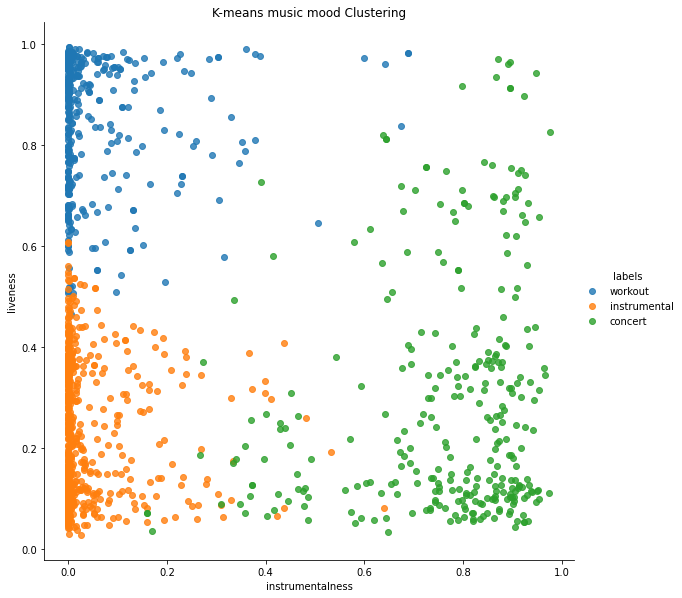

In [ ]:
import seaborn as sns

sns.lmplot(data=df_spotify, x="instrumentalness", y="liveness", hue="labels", fit_reg=False, legend=True, legend_out=True, height=8,aspect=1)
plt.title('K-means music mood Clustering')
plt.show()

Finally, the playlist ready to export!

* **Workout:**

In [ ]:
df_spotify[df_spotify['kmeans']==0]['artist'].value_counts()

dream theater           131
killswitch engage       107
parkway drive            91
bring me the horizon     82
metallica                80
periphery                64
meshuggah                56
iron maiden              47
septicflesh              23
lorna shore              19
mestis                    1
Name: artist, dtype: int64

* **Concerts / Live:**

In [ ]:
df_spotify[df_spotify['kmeans']==1]['artist'].value_counts()

septicflesh             127
meshuggah                83
dream theater            25
mestis                   25
lorna shore              21
metallica                13
killswitch engage         9
periphery                 8
parkway drive             8
bring me the horizon      5
iron maiden               1
Name: artist, dtype: int64

* **Instrumetal:**

In [ ]:
df_spotify[df_spotify['kmeans']==2]['artist'].value_counts()

dream theater           131
killswitch engage       106
parkway drive            90
bring me the horizon     81
metallica                80
periphery                64
meshuggah                53
iron maiden              46
septicflesh              23
lorna shore              19
spiritbox                 4
Name: artist, dtype: int64

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cluster_mood.pkl to cluster_mood.pkl


In [ ]:
import pickle

# load the model from disk
loaded_model = pickle.load(open(uploaded, 'rb'))
result = loaded_model.labels_
print(result)

TypeError: ignored

### 3.2. Conectivity-based: Agglomerative Hierarchical clustering

#### Model implementation

Let's try with 3 clusters, like the previous model.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') # ward minimize the variance of the clusters
cluster.fit_predict(X_scaled)

array([2, 1, 2, ..., 1, 1, 1])

Insert the clusters obtained by the method:

In [ ]:
df_spotify['Agglomerative'] = cluster.labels_
df_spotify.head()

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,labels,Agglomerative
0,dream theater,distant memories - live in london (bonus track...,"untethered angel - live at hammersmith apollo,...",0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,35,0,workout,2
1,dream theater,distant memories - live in london (bonus track...,a nightmare to remember - live at hammersmith ...,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,35,0,workout,1
2,dream theater,distant memories - live in london (bonus track...,fall into the light - live at hammersmith apol...,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,33,0,workout,2
3,dream theater,distant memories - live in london (bonus track...,"barstool warrior - live at hammersmith apollo,...",0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,34,0,workout,2
4,dream theater,distant memories - live in london (bonus track...,in the presence of enemies - part 1 - live at ...,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,33,2,instrumental,1


#### Clusters Validation

In [ ]:
# Mean features
df_spotify.groupby(['Agglomerative'], dropna=False).mean()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans
Agglomerative,,,,,,,,,,,
0,0.168595,0.332553,0.763370,0.700511,0.326052,-7.556488,0.094108,123.216446,0.217908,24.728916,1.024096
1,0.011232,0.363097,0.902857,0.045246,0.229391,-5.286299,0.103402,125.923432,0.268751,34.856938,1.898426
2,0.024328,0.285279,0.922243,0.046291,0.847644,-5.955108,0.123646,120.984351,0.214654,28.555249,0.099448


To conclude, the clusters created represent:

* **Cluster 0:** Most of these songs are instrumental and a bit more acoustic than the other, due to synths and instruments related, perfect for the "ambience" situation like studying or working.
* **Cluster 1:** The most popular, loud and fast songs. In context, we can sell this playlist like as a "workout" playlist, to make exercise, run, etc.
* **Cluster 2:** The live songs, with the most energy and slow tempo. This playlist can represent a "concert" situation.

Compared with the Kmeans model, the groups generated are so similar, but with a different order, let see the difference between the results for each track.

In [ ]:
# Compare results of each row between the two methods

cluster_results = df_spotify.loc[:,['kmeans','Agglomerative']]

# Unifying the labels of the Agglomerative method
d={0:2,1:0,2:1}
cluster_results['kmeans'] = cluster_results.kmeans.apply(lambda x:d[x])
cluster_results.head()

,kmeans,Agglomerative
0,2,2
1,2,1
2,2,2
3,2,2
4,1,1


In [ ]:
cluster_results['comparative'] = cluster_results['kmeans'] == cluster_results['Agglomerative']
cluster_results['comparative'].value_counts()

True     1282
False     111
Name: comparative, dtype: int64

In [ ]:
print("Model results validation:\n")
print((cluster_results['comparative'].value_counts()/len(cluster_results))*100)

Model results validation:

True     92.031587
False     7.968413
Name: comparative, dtype: float64


The results in two clusters are similar in a 92%

Visualizing some clusters to graphically validate this relation:

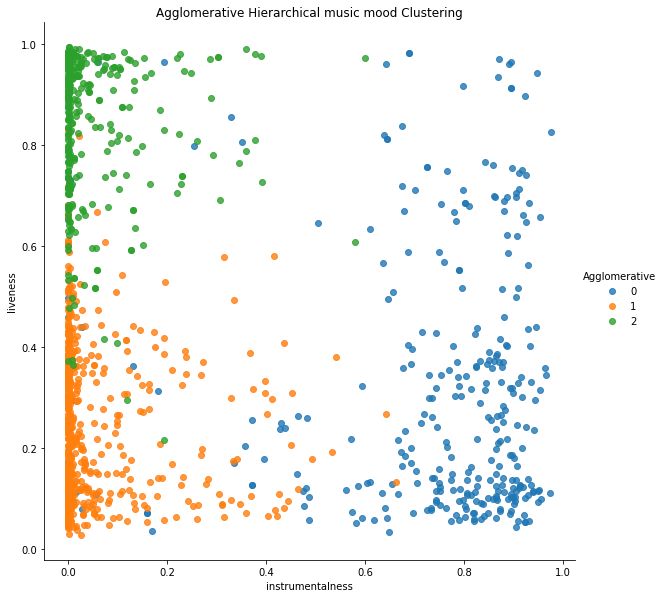

In [ ]:
sns.lmplot(data=df_spotify, x="instrumentalness", y="liveness", hue="Agglomerative", fit_reg=False, legend=True, legend_out=True, height=8,aspect=1)
plt.title('Agglomerative Hierarchical music mood Clustering')
plt.show()

Finally, add the corresponding labels to the clusters created

In [ ]:
d={0:"instrumetal",1:"workout",2:"concert"}
df_spotify['labels_agglomerative'] = df_spotify.Agglomerative.apply(lambda x:d[x])
df_spotify.head()

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,labels,Agglomerative,gmm,labels_agglomerative
0,dream theater,distant memories - live in london (bonus track...,"untethered angel - live at hammersmith apollo,...",0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,35,0,workout,2,2,concert
1,dream theater,distant memories - live in london (bonus track...,a nightmare to remember - live at hammersmith ...,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,35,0,workout,1,1,workout
2,dream theater,distant memories - live in london (bonus track...,fall into the light - live at hammersmith apol...,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,33,0,workout,2,4,concert
3,dream theater,distant memories - live in london (bonus track...,"barstool warrior - live at hammersmith apollo,...",0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,34,0,workout,2,2,concert
4,dream theater,distant memories - live in london (bonus track...,in the presence of enemies - part 1 - live at ...,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,33,2,instrumental,1,1,workout


### 3.3. Distribution-based: Gaussian Mixture model

This model takes the Gaussian probability distributions of each point in the data.

#### BIC metric to obtain number of clusters

The optimal number of clusters (K) is the value that minimizes the Bayesian information criterion (BIC).

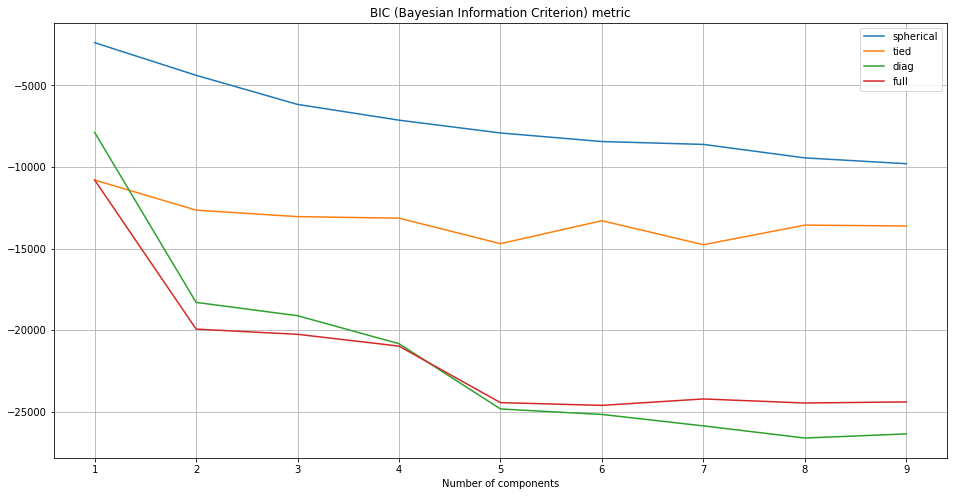

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

n_components = range(1, 10)                                  # Maximum number of clusters
covariance_types = ['spherical', 'tied', 'diag', 'full']    # Covariance matrix types

for covariance_type in covariance_types:
    bic_values = []
    
    for i in n_components:
        gmm = GaussianMixture(n_components=i, covariance_type=covariance_type, random_state=1)
        tr_model = gmm.fit(X_scaled)
        bic_values.append(tr_model.bic(X_scaled))
        #aic_values.append(tr_model.aic(X_scaled))
        
    ax.plot(n_components, bic_values, label=covariance_type)
        
ax.set_title("BIC (Bayesian Information Criterion) metric")
ax.set_xlabel("Number of components")
ax.grid()
ax.legend()
plt.show()

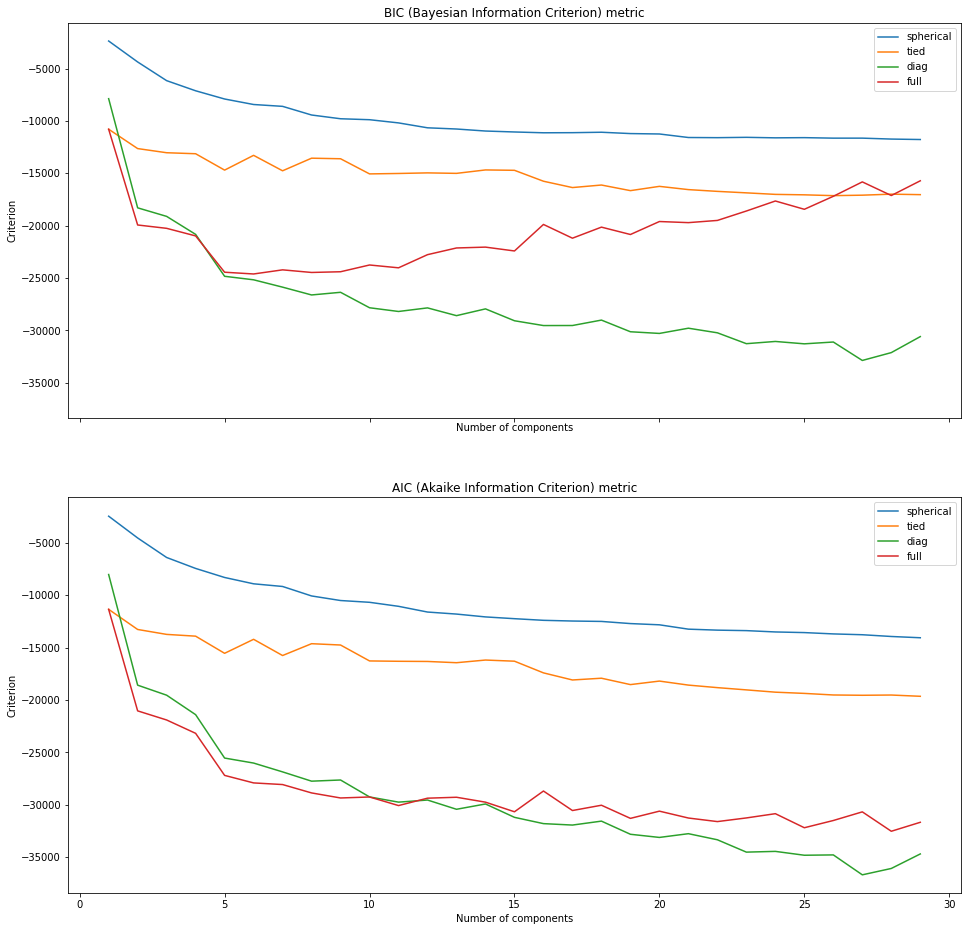

In [ ]:
from sklearn.mixture import GaussianMixture

fig, axs = plt.subplots(2,1,figsize=(16, 16), sharex=True, sharey=True)
axs = axs.ravel()

titles = ["BIC (Bayesian Information Criterion) metric","AIC (Akaike Information Criterion) metric"]

n_components = range(1, 30)                                  # Maximum number of clusters
covariance_types = ['spherical', 'tied', 'diag', 'full']    # Covariance matrix types

#k=0

for j in range(2):
  for covariance_type in covariance_types:
    criterion = [list() for x in range(2)]                                     # BIC, AIC

    for i in n_components:

      gmm = GaussianMixture(n_components=i, covariance_type=covariance_type, random_state=1)
      tr_model = gmm.fit(X_scaled)
      criterion[0].append(tr_model.bic(X_scaled))
      criterion[1].append(tr_model.aic(X_scaled))
        
    axs[j].plot(n_components, criterion[j], label=covariance_type)
    axs[j].set_title(titles[j])
    axs[j].set_xlabel("Number of components")
    axs[j].set_ylabel("Criterion")  
    axs[j].legend();

Comparing the two metrics with full covariance type

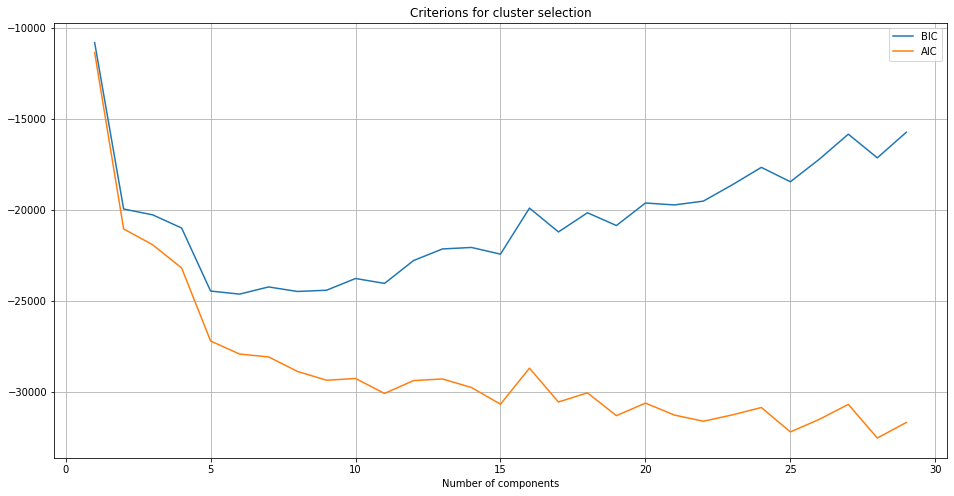

In [ ]:
n_components = range(1, 30) 
models = [GaussianMixture(n, covariance_type='full', random_state=1).fit(X_scaled) for n in n_components]

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(n_components, [m.bic(X_scaled) for m in models], label='BIC')
ax.plot(n_components, [m.aic(X_scaled) for m in models], label='AIC')

ax.set_title("Criterions for cluster selection")
ax.legend(loc='best')
ax.set_xlabel("Number of components")
ax.grid();

Based on the AIC and BIC criterion, the right number of clusters starts from 5 with a diag covariance matrix. 

#### Model Implementation

In [ ]:
# Fit with cluster selection
gmm_model = GaussianMixture(
                n_components    = 5,
                covariance_type = 'full',
                random_state    = 1, 
             )
gmm_model.fit(X=X_scaled)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=1, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
df_spotify['Agglomerative'] = cluster.labels_
df_spotify.head()

In [ ]:
# Predict labels
labels = gmm_model.predict(X_scaled)

df_spotify['gmm'] = labels
df_spotify.head()

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,labels,Agglomerative,gmm
0,dream theater,distant memories - live in london (bonus track...,"untethered angel - live at hammersmith apollo,...",0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,35,0,workout,2,2
1,dream theater,distant memories - live in london (bonus track...,a nightmare to remember - live at hammersmith ...,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,35,0,workout,1,1
2,dream theater,distant memories - live in london (bonus track...,fall into the light - live at hammersmith apol...,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,33,0,workout,2,4
3,dream theater,distant memories - live in london (bonus track...,"barstool warrior - live at hammersmith apollo,...",0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,34,0,workout,2,2
4,dream theater,distant memories - live in london (bonus track...,in the presence of enemies - part 1 - live at ...,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,33,2,instrumental,1,1


#### Clusters Validation

In [ ]:
# Mean features
df_spotify.groupby(['gmm'], dropna=False).mean()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,Agglomerative
gmm,,,,,,,,,,,,
0,0.010686,0.355103,0.854657,0.000843,0.309546,-5.571634,0.093833,124.192634,0.267454,38.497143,1.634286,1.154286
1,0.000533,0.343852,0.923151,0.425924,0.323358,-5.327806,0.097344,125.271530,0.244800,28.412766,1.297872,0.665957
2,0.000825,0.331635,0.959187,0.002397,0.420827,-4.939049,0.127430,125.798184,0.258294,33.585678,1.386189,1.299233
3,0.288107,0.336837,0.631469,0.310842,0.428076,-9.160867,0.094726,118.808921,0.208324,25.966805,1.082988,0.697095
4,0.006504,0.283474,0.928586,0.041139,0.875707,-6.392966,0.115991,123.218138,0.214207,29.577586,0.034483,2.000000


To conclude, the clusters created represent:

* **Cluster 0:** The most popular and positive songs by *valence* and *danceability*, like a "happy" playlist.
* **Cluster 1:** The most instrumental playlist with high energy, danceability, and fast tempo, in a "Metal comunity" context, it can be the "virtuosism" playlist, highlighting the instruments and the energy of the songs. To validate regarding the other models this playlist can be the "instrumetal" playlist.
* **Cluster 2:** The most energic, loud and fast songs, it can be the "heavy" or "workout" playlist.
* **Cluster 3:** With the higher level of acousticness, low energy, slow tempo and lower valence, it can be the "Sad" playlist, due to this kind of songs have these features.
* **Cluster 4:** With the higher level of liveness, and one of the top of energy levels, it can be the "Concert/live" playlist, its interesting because in Agglomerative clustering this cluster is the "2" that represent the same kind of playlist.

To evaluate the posibility to find explicit clusters with 2D perspective:

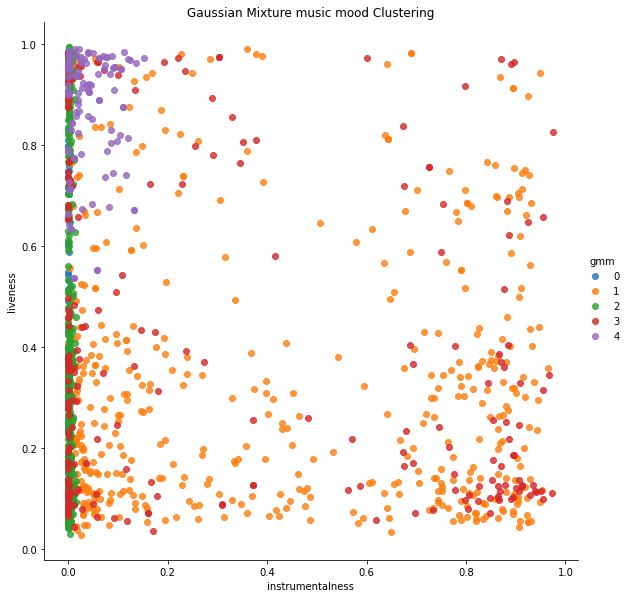

In [ ]:
sns.lmplot(data=df_spotify, x="instrumentalness", y="liveness", hue="gmm", fit_reg=False, legend=True, legend_out=True, height=8,aspect=1)
plt.title('Gaussian Mixture music mood Clustering')
plt.show()

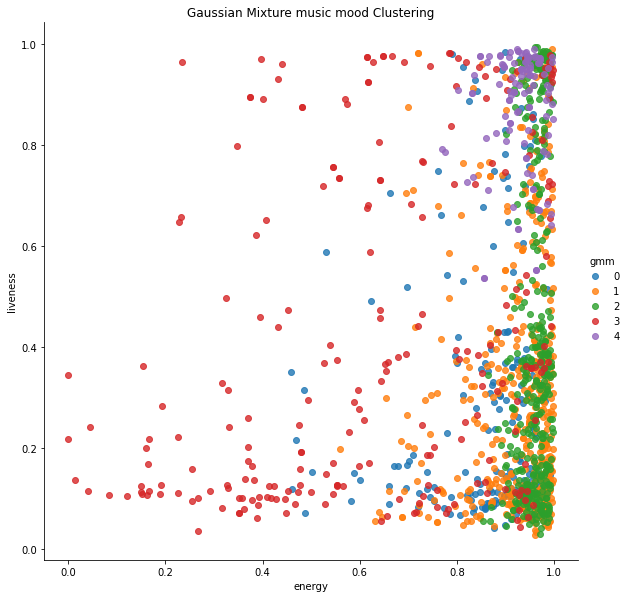

In [ ]:
sns.lmplot(data=df_spotify, x="energy", y="liveness", hue="gmm", fit_reg=False, legend=True, legend_out=True, height=8,aspect=1)
plt.title('Gaussian Mixture music mood Clustering')
plt.show()

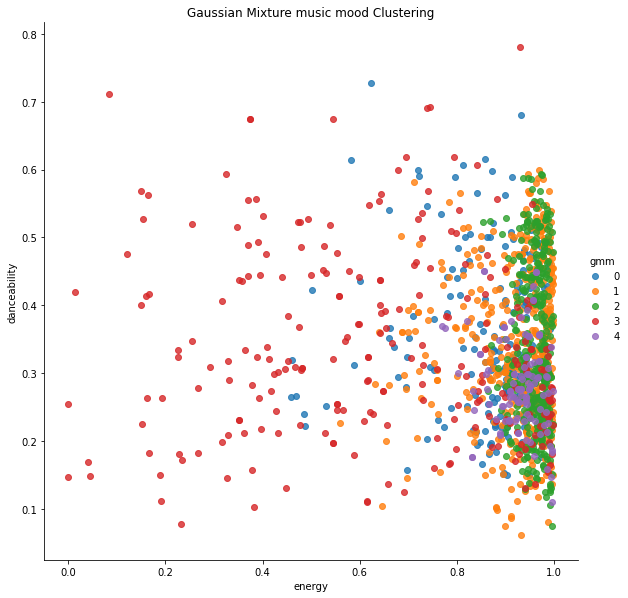

In [ ]:
sns.lmplot(data=df_spotify, x="energy", y="danceability", hue="gmm", fit_reg=False, legend=True, legend_out=True, height=8,aspect=1)
plt.title('Gaussian Mixture music mood Clustering')
plt.show()

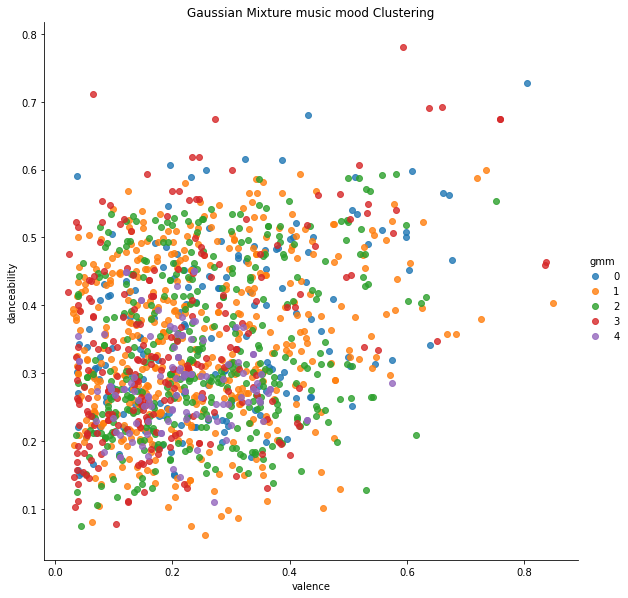

In [ ]:
sns.lmplot(data=df_spotify, x="valence", y="danceability", hue="gmm", fit_reg=False, legend=True, legend_out=True, height=8,aspect=1)
plt.title('Gaussian Mixture music mood Clustering')
plt.show()

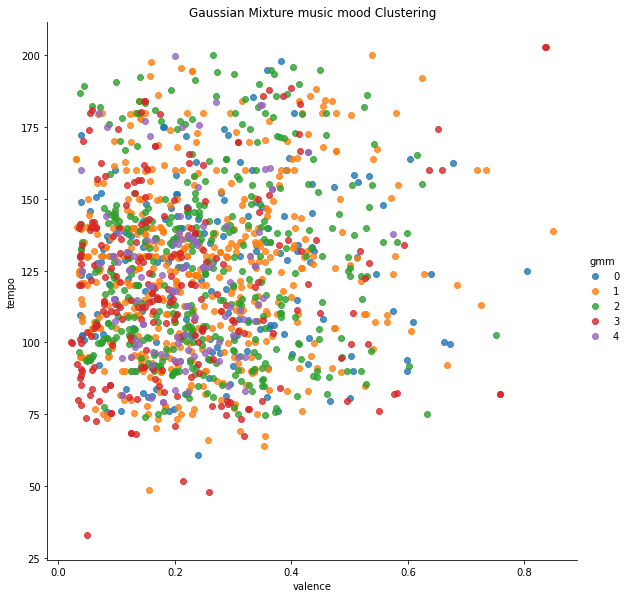

In [ ]:
sns.lmplot(data=df_spotify, x="valence", y="tempo", hue="gmm", fit_reg=False, legend=True, legend_out=True, height=8,aspect=1)
plt.title('Gaussian Mixture music mood Clustering')
plt.show()

In this case we can't see explicitly the clusters with only two variables, but we can compare respect to the previous models:

In [ ]:
cluster_results = df_spotify.loc[:,['kmeans','Agglomerative','gmm']]

In this case we don't unify the clusters, since they're more.

In [ ]:
cluster_results.head()

,kmeans,Agglomerative,gmm
0,0,2,2
1,0,1,1
2,0,2,4
3,0,2,2
4,2,1,1


In [ ]:
# Regarding Kmeans Algorithm

print("Workout playlist respect to the playlists created by GMM:\n")
print(((cluster_results[cluster_results['kmeans']==0]['gmm'].value_counts())/len(cluster_results[cluster_results['kmeans']==0]))*100)

print("\nConcert/Live playlist respect to the playlists created by GMM:\n")
print(((cluster_results[cluster_results['kmeans']==1]['gmm'].value_counts())/len(cluster_results[cluster_results['kmeans']==1]))*100)

print("\nAmbience playlist respect to the playlists created by GMM:\n")
print(((cluster_results[cluster_results['kmeans']==2]['gmm'].value_counts())/len(cluster_results[cluster_results['kmeans']==2]))*100)

Workout playlist respect to the playlists created by GMM:

2    31.007752
4    29.457364
3    17.571059
1    13.695090
0     8.268734
Name: gmm, dtype: float64

Concert/Live playlist respect to the playlists created by GMM:

1    72.491909
3    27.508091
Name: gmm, dtype: float64

Ambience playlist respect to the playlists created by GMM:

2    38.880918
1    27.690100
0    20.516499
3    12.625538
4     0.286944
Name: gmm, dtype: float64


In [ ]:
# Regarding Agglomerative Hierarchical clustering Algorithm

print("Ambience playlist respect to the playlists created by GMM:\n")
print(((cluster_results[cluster_results['Agglomerative']==0]['gmm'].value_counts())/len(cluster_results[cluster_results['Agglomerative']==0]))*100)

print("\nWorkout playlist respect to the playlists created by GMM:\n")
print(((cluster_results[cluster_results['Agglomerative']==1]['gmm'].value_counts())/len(cluster_results[cluster_results['Agglomerative']==1]))*100)

print("\nConcert/Live playlist respect to the playlists created by GMM:\n")
print(((cluster_results[cluster_results['Agglomerative']==2]['gmm'].value_counts())/len(cluster_results[cluster_results['Agglomerative']==2]))*100)

Ambience playlist respect to the playlists created by GMM:

1    62.951807
3    37.048193
Name: gmm, dtype: float64

Workout playlist respect to the playlists created by GMM:

2    39.198856
1    29.899857
0    21.173104
3     9.728183
Name: gmm, dtype: float64

Concert/Live playlist respect to the playlists created by GMM:

2    32.320442
4    32.044199
1    14.364641
3    13.812155
0     7.458564
Name: gmm, dtype: float64


Most of the first two coincidences are similar regarding the cluster created by the previous models, but since we created new clusters these take other features that make the difference.

Finally, label the clusters

In [ ]:
d={0:"happy",1:"instrumetal",2:"workout",3:"sad",4:"concert"}
df_spotify['labels_gmm'] = df_spotify.gmm.apply(lambda x:d[x])
df_spotify.head()

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,labels,Agglomerative,gmm,labels_agglomerative,dbscan,labels_dbscan,labels_gmm
0,dream theater,distant memories - live in london (bonus track...,"untethered angel - live at hammersmith apollo,...",0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,35,0,workout,2,2,concert,0,workout,workout
1,dream theater,distant memories - live in london (bonus track...,a nightmare to remember - live at hammersmith ...,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,35,0,workout,1,1,workout,0,workout,instrumetal
2,dream theater,distant memories - live in london (bonus track...,fall into the light - live at hammersmith apol...,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,33,0,workout,2,4,concert,0,workout,concert
3,dream theater,distant memories - live in london (bonus track...,"barstool warrior - live at hammersmith apollo,...",0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,34,0,workout,2,2,concert,0,workout,workout
4,dream theater,distant memories - live in london (bonus track...,in the presence of enemies - part 1 - live at ...,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,33,2,instrumental,1,1,workout,0,workout,instrumetal


### 3.4. Density-based: DBSCAN

Density-Based Spatial Clustering of Applications with Noise.

In this case we don't have to calculate the optimal number of clusters, the method give us the number of clusters based on the density of each one.

#### Model Implementation

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, silhouette_score

# Train
model_dbscan = DBSCAN(eps=0.7, min_samples = 10)
model_dbscan.fit(X_scaled)

# Number of clusters
pred_clusters = model_dbscan.labels_
n_clusters_ = len(set(pred_clusters))

print(f'Number of clusters: {n_clusters_}')

Number of clusters: 3


In this case, we have again three clusters to analyze

In [ ]:
df_spotify['dbscan'] = pred_clusters
df_spotify.head()

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,labels,Agglomerative,gmm,labels_agglomerative,dbscan
0,dream theater,distant memories - live in london (bonus track...,"untethered angel - live at hammersmith apollo,...",0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,35,0,workout,2,2,concert,0
1,dream theater,distant memories - live in london (bonus track...,a nightmare to remember - live at hammersmith ...,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,35,0,workout,1,1,workout,0
2,dream theater,distant memories - live in london (bonus track...,fall into the light - live at hammersmith apol...,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,33,0,workout,2,4,concert,0
3,dream theater,distant memories - live in london (bonus track...,"barstool warrior - live at hammersmith apollo,...",0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,34,0,workout,2,2,concert,0
4,dream theater,distant memories - live in london (bonus track...,in the presence of enemies - part 1 - live at ...,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,33,2,instrumental,1,1,workout,0


In [ ]:
set(pred_clusters)

{-1, 0, 1}

#### Clusters Validation

In [ ]:
# Mean features
df_spotify.groupby(['dbscan'], dropna=False).mean()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,Agglomerative,gmm
dbscan,,,,,,,,,,,,,
-1,0.677781,0.326057,0.344733,0.512523,0.360020,-13.871469,0.133308,114.086204,0.183029,23.224490,1.040816,0.020408,3.000000
0,0.025400,0.336535,0.897142,0.186293,0.416586,-5.691726,0.105899,124.418981,0.245775,31.226048,1.230539,1.064371,1.697605
1,0.685750,0.237000,0.364250,0.869125,0.155125,-9.472250,0.033612,113.836500,0.072950,7.000000,1.000000,0.000000,3.000000


To conclude, the clusters created represent:

* **Cluster -1:** With a high level of acousticness, lower energy and loudness. This would be a "relaxed" playlist.

* **Cluster 0:** Most of the tracks with highest energy, liveness, valence, loudness and fast tempo are located here, also the most popular tracks. This is perfect for "workout" or "heavy" playlist.

* **Cluster 1:** The most acoustic, instrumental and sad songs are located here, also the lower tempo, this playlist would be categorized as the "relaxed" music too, but a bit darker and sad, for studying or working.

In [ ]:
d={-1:"relaxed",0:"workout",1:"instrumental"}
df_spotify['labels_dbscan'] = df_spotify.dbscan.apply(lambda x:d[x])
df_spotify.head()

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,labels,Agglomerative,gmm,labels_agglomerative,dbscan,labels_dbscan
0,dream theater,distant memories - live in london (bonus track...,"untethered angel - live at hammersmith apollo,...",0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,35,0,workout,2,2,concert,0,workout
1,dream theater,distant memories - live in london (bonus track...,a nightmare to remember - live at hammersmith ...,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,35,0,workout,1,1,workout,0,workout
2,dream theater,distant memories - live in london (bonus track...,fall into the light - live at hammersmith apol...,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,33,0,workout,2,4,concert,0,workout
3,dream theater,distant memories - live in london (bonus track...,"barstool warrior - live at hammersmith apollo,...",0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,34,0,workout,2,2,concert,0,workout
4,dream theater,distant memories - live in london (bonus track...,in the presence of enemies - part 1 - live at ...,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,33,2,instrumental,1,1,workout,0,workout


Lets compare between the previous model results:

In [ ]:
cluster_results['labels'].value_counts()

instrumental    697
workout         387
concert         309
Name: labels, dtype: int64

In [ ]:
cluster_results['labels_dbscan'].value_counts()

workout         1336
relaxed           49
instrumental       8
Name: labels_dbscan, dtype: int64

In [ ]:
cluster_results = df_spotify.loc[:,['labels','labels_agglomerative','labels_gmm','labels_dbscan']]

# Regarding Kmeans Algorithm

print("Workout playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels']=='workout']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels']=='workout']))*100)

print("\nInstrumetal playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels']=='instrumental']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels']=='instrumental']))*100)

print("\nConcert playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels']=='concert']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels']=='concert']))*100)

Workout playlist respect to the playlists created by DBSCAN:

workout    97.932817
relaxed     2.067183
Name: labels_dbscan, dtype: float64

Instrumetal playlist respect to the playlists created by DBSCAN:

workout    98.56528
relaxed     1.43472
Name: labels_dbscan, dtype: float64

Concert playlist respect to the playlists created by DBSCAN:

workout         87.378641
relaxed         10.032362
instrumental     2.588997
Name: labels_dbscan, dtype: float64


In [ ]:
cluster_results['labels_agglomerative'].value_counts()

workout        699
concert        362
instrumetal    332
Name: labels_agglomerative, dtype: int64

In [ ]:
cluster_results['labels_dbscan'].value_counts()

workout         1336
relaxed           49
instrumental       8
Name: labels_dbscan, dtype: int64

In [ ]:
cluster_results['labels_dbscan'].value_counts()/len(cluster_results['labels_dbscan'])*100

workout         95.908112
relaxed          3.517588
instrumental     0.574300
Name: labels_dbscan, dtype: float64

In [ ]:
# Regarding Agglomerative Hierarchical clustering Algorithm

print("Workout playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels_agglomerative']=='workout']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels_agglomerative']=='workout']))*100)

print("\nConcert playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels_agglomerative']=='concert']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels_agglomerative']=='concert']))*100)

print("\nInstrumetal playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels_agglomerative']=='instrumetal']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels_agglomerative']=='instrumetal']))*100)

Workout playlist respect to the playlists created by DBSCAN:

workout    99.856938
relaxed     0.143062
Name: labels_dbscan, dtype: float64

Concert playlist respect to the playlists created by DBSCAN:

workout    100.0
Name: labels_dbscan, dtype: float64

Instrumetal playlist respect to the playlists created by DBSCAN:

workout         83.132530
relaxed         14.457831
instrumental     2.409639
Name: labels_dbscan, dtype: float64


In [ ]:
cluster_results['labels_gmm'].value_counts()

instrumetal    470
workout        391
sad            241
happy          175
concert        116
Name: labels_gmm, dtype: int64

In [ ]:
# Regarding GMM Algorithm

print("Instrumetal GMM playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels_gmm']=='instrumetal']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels_gmm']=='instrumetal']))*100)

print("\nWorkout GMM playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels_gmm']=='workout']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels_gmm']=='workout']))*100)

print("\nSad GMM playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels_gmm']=='sad']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels_gmm']=='sad']))*100)

print("\nConcert/Live GMM playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels_gmm']=='happy']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels_gmm']=='happy']))*100)

print("\nConcert/Live GMM playlist respect to the playlists created by DBSCAN:\n")
print(((cluster_results[cluster_results['labels_gmm']=='concert']['labels_dbscan'].value_counts())/len(cluster_results[cluster_results['labels_gmm']=='concert']))*100)

Instrumetal GMM playlist respect to the playlists created by DBSCAN:

workout    100.0
Name: labels_dbscan, dtype: float64

Workout GMM playlist respect to the playlists created by DBSCAN:

workout    100.0
Name: labels_dbscan, dtype: float64

Sad GMM playlist respect to the playlists created by DBSCAN:

workout         76.348548
relaxed         20.331950
instrumental     3.319502
Name: labels_dbscan, dtype: float64

Concert/Live GMM playlist respect to the playlists created by DBSCAN:

workout    100.0
Name: labels_dbscan, dtype: float64

Concert/Live GMM playlist respect to the playlists created by DBSCAN:

workout    100.0
Name: labels_dbscan, dtype: float64


The results with DBSCAN don't seem to be reliable, because it has a dominant cluster with the 95% of the data (the workout playist), this bias prevent the playlists identification and the above comparisons prove it.

### 3.5. Centroid-based: Mean Shift

#### Model implementation

Estimate the bandwidth (size of the cluster) and then identify the clusters

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_scaled, quantile=0.2)
bandwidth

0.8907052999174286

In [ ]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


Let's add the results in our dataframe

In [ ]:
df_spotify['mean_shift'] = labels
df_spotify.head()

,artist,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,labels,Agglomerative,gmm,labels_agglomerative,dbscan,labels_dbscan,labels_gmm,mean_shift
0,dream theater,distant memories - live in london (bonus track...,"untethered angel - live at hammersmith apollo,...",0.000180,0.463,0.966,0.00148,0.994,-6.179,0.1010,89.973,0.2010,35,0,workout,2,2,concert,0,workout,workout,0
1,dream theater,distant memories - live in london (bonus track...,a nightmare to remember - live at hammersmith ...,0.000091,0.257,0.964,0.07530,0.609,-6.921,0.2380,136.444,0.0897,35,0,workout,1,1,workout,0,workout,instrumetal,0
2,dream theater,distant memories - live in london (bonus track...,fall into the light - live at hammersmith apol...,0.000333,0.210,0.972,0.15300,0.973,-6.503,0.2830,171.961,0.1570,33,0,workout,2,4,concert,0,workout,concert,0
3,dream theater,distant memories - live in london (bonus track...,"barstool warrior - live at hammersmith apollo,...",0.000518,0.394,0.945,0.00615,0.972,-6.379,0.0911,155.978,0.2210,34,0,workout,2,2,concert,0,workout,workout,0
4,dream theater,distant memories - live in london (bonus track...,in the presence of enemies - part 1 - live at ...,0.000317,0.172,0.952,0.09520,0.427,-6.449,0.2180,186.270,0.1710,33,2,instrumental,1,1,workout,0,workout,instrumetal,0


#### Clusters validation

In [ ]:
# Mean features
df_spotify.groupby(['mean_shift'], dropna=False).mean()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,kmeans,Agglomerative,gmm,dbscan
mean_shift,,,,,,,,,,,,,,
0,0.020076,0.339984,0.904095,0.136556,0.426619,-5.625490,0.109177,124.838809,0.248012,32.316896,1.247373,1.148747,1.693614,-0.005659
1,0.238370,0.280707,0.671754,0.784762,0.203146,-8.064483,0.070610,119.953975,0.185242,15.283333,1.025000,0.000000,2.066667,-0.175000
2,0.533157,0.367750,0.539228,0.496185,0.648189,-12.032139,0.132139,108.460833,0.246869,30.611111,1.027778,0.055556,2.666667,-0.361111


To conclude, the clusters created represent:

* **Cluster 0:** The most popular, loud, energic and fast songs. In context, we can sell this playlist like as a "workout" playlist, to make exercise, run, etc.
* **Cluster 1:** The instrumental songs, with the lowes level of valence and less popular. These can represent a "sad instrumental" or "songs in minor scale" playlists.
* **Cluster 2:** Most of these songs have Concert/Live situations but also has the lower loudness and energy, and the slower tempo, also has the highest acousticness. This kind of songs can be in a "relaxed" or "to concentrate" playlists.

Validate the ratios of each group:

In [ ]:
df_spotify['mean_shift'].value_counts()

0    1237
1     120
2      36
Name: mean_shift, dtype: int64

In [ ]:
df_spotify['mean_shift'].value_counts() / len(df_spotify['mean_shift'])*100

0    88.801149
1     8.614501
2     2.584350
Name: mean_shift, dtype: float64

Like in DBSCAN, the majority of observations are in one Cluster, to correct that lets tune again the parameters of bandwidth to the clustering algorithm

In [ ]:
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2,n_samples=100)
bandwidth

0.8845794948894695

In [ ]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


Tunning the bandwidth parameter it adds a new cluster, let's see what it is:

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 1231, 1: 119, 2: 34, 3: 9}

Again we have the bias problem with only one cluster, what it implies that this model like the DBSCAN doesn't fit very well this dataset.